In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_2018 = pd.read_excel("cleaned 2018.xlsx")
df_2019 = pd.read_excel("cleaned 2019.xlsx")
df_2020 = pd.read_excel("cleaned 2020.xlsx")
df_2021 = pd.read_excel("cleaned 2021.xlsx")

In [3]:
df_2019.rename(columns={'Company Name': 'Company/Brand'}, inplace=True)

In [4]:
df_2018.dropna(inplace=True)
df_2018.reset_index(drop=True, inplace=True)

df_2019.dropna(inplace=True)
df_2019.reset_index(drop=True, inplace=True)

df_2020.dropna(inplace=True)
df_2020.reset_index(drop=True, inplace=True)

df_2021.dropna(inplace=True)
df_2021.reset_index(drop=True, inplace=True)

In [5]:
# Adding column year

Year = ["2018" for i in range(df_2018.shape[0])]
df_2018["Year"] = Year

Year = ["2019" for i in range(df_2019.shape[0])]
df_2019["Year"] = Year

Year = ["2020" for i in range(df_2020.shape[0])]
df_2020["Year"] = Year

Year = ["2021" for i in range(df_2021.shape[0])]
df_2021["Year"] = Year

In [6]:
#Combining the datasets
data = [df_2018, df_2019, df_2020, df_2021]
df_main = pd.concat(data)

In [7]:
df_main

,Company/Brand,Industry,Series,Amount($),What it does,City,Sub city,Sector,Year,Founded,Founders,Investor,Stage,HeadQuarter
0,TheCollegeFever,Brand Marketing,Seed,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",Bangalore,Karnataka,"Event Promotion, Marketing, Sponsorship, Tick...",2018,NaN,NaN,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,40000000.0,A startup which aggregates milk from dairy far...,Mumbai,Maharashtra,Farming,2018,NaN,NaN,NaN,NaN,NaN
2,MyLoanCare,Credit,Series A,65000000.0,Leading Online Loans Marketplace in India,Gurgaon,Haryana,"Financial Services, Lending, Marketplace",2018,NaN,NaN,NaN,NaN,NaN
3,PayMe India,Financial Services,Angel,2000000.0,PayMe India is an innovative FinTech organizat...,Noida,Uttar Pradesh,FinTech,2018,NaN,NaN,NaN,NaN,NaN
4,Eunimart,E-Commerce Platforms,Seed,0.0,Eunimart is a one stop solution for merchants ...,Hyderabad,Andhra Pradesh,"Retail, SaaS",2018,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,NaN,NaN,3000000.0,A gig/on-demand staffing company.,NaN,NaN,Staffing & Recruiting,2021,2019,"Chirag Mittal, Anirudh Syal",Endiya Partners,Pre-series A,Gurugram
1205,Vahdam,NaN,NaN,20000000.0,VAHDAM is among the world’s first vertically i...,NaN,NaN,Food & Beverages,2021,2015,Bala Sarda,IIFL AMC,Series D,New Delhi
1206,Leap Finance,NaN,NaN,55000000.0,International education loans for high potenti...,NaN,NaN,Financial Services,2021,2019,"Arnav Kumar, Vaibhav Singh",Owl Ventures,Series C,Bangalore
1207,CollegeDekho,NaN,NaN,26000000.0,"Collegedekho.com is Student’s Partner, Friend ...",NaN,NaN,EdTech,2021,2015,Ruchir Arora,"Winter Capital, ETS, Man Capital",Series B,Gurugram


In [8]:
df_main.isnull().any()

Company/Brand    False
Industry          True
Series            True
Amount($)        False
What it does     False
City              True
Sub city          True
Sector           False
Year             False
Founded           True
Founders          True
Investor          True
Stage             True
HeadQuarter       True
dtype: bool

## Statistics 

In [9]:
df_main.describe()

,Amount($)
count,2.625000e+03
mean,1.263817e+08
std,3.249302e+09
min,0.000000e+00
25%,6.000000e+05
50%,3.500000e+06
75%,1.194350e+07
max,1.500000e+11


array([[<AxesSubplot:title={'center':'Amount($)'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

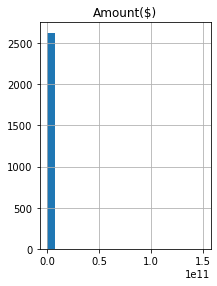

In [10]:
df_main.hist(
    figsize=(15, 15),
    layout=(3,4),
    bins=20
)

## The Company with largest Amount of Investment/Funding

In [11]:
large_com = df_main.sort_values(by='Amount($)', ascending=False).head(1)

In [12]:
large_com

,Company/Brand,Industry,Series,Amount($),What it does,City,Sub city,Sector,Year,Founded,Founders,Investor,Stage,HeadQuarter
73,Alteria Capital,NaN,NaN,1.500000e+11,Alteria Capital is a Venture debt firm .,NaN,NaN,FinTech,2021,2018,Vinod Murali,unkown,Debt,Mumbai


## Which Companies have received the Highest Funding Amounts($)?

In [13]:
top_10_com = df_main.groupby("Company/Brand")["Amount($)"].sum().reset_index()

In [14]:
top_10_com = top_10_com.sort_values(by = "Amount($)", ascending = False).head(10)

In [15]:
top_10_com

,Company/Brand,Amount($)
65,Alteria Capital,1.500000e+11
1425,Reliance Retail Ventures Ltd,7.000000e+10
837,Indiabulls Ventures,1.539200e+10
659,Fusion Microfinance,5.200000e+09
323,ClearTax,4.000000e+09
1574,Snowflake,3.000000e+09
1181,Ninjacart,2.540000e+09
23,APAC Financial Services,2.500000e+09
1422,Reliance,2.200000e+09
207,Blackbuck,2.041544e+09


In [16]:
top_10_com["Amount($)"] = top_10_com["Amount($)"].apply(lambda x : "{:.0f}".format(x) )

In [17]:
top_10_com["Amount($)"] = top_10_com["Amount($)"].astype(float)

In [18]:
type(top_10_com["Amount($)"])

pandas.core.series.Series

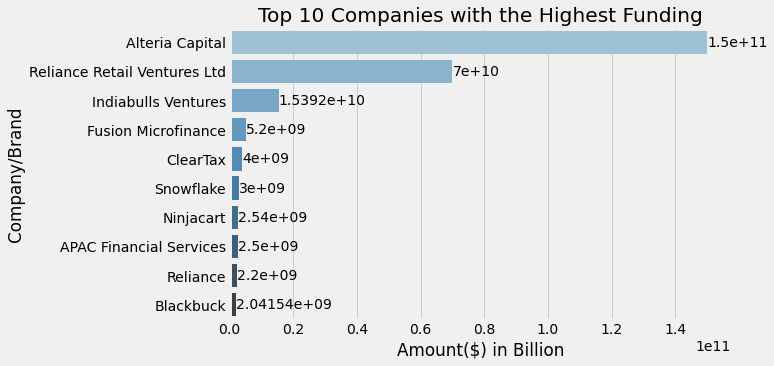

In [60]:
plt.figure(figsize=(8,5))
plt.title("Top 10 Companies with the Highest Funding")
plt.style.use("fivethirtyeight")
fig = sns.barplot(y = "Company/Brand", x = "Amount($)", palette = "Blues_d", data = top_10_com)
fig.set(xlabel="Amount($) in Billion", ylabel="Company/Brand")
for i in fig.containers:
    fig.bar_label(i,)
plt.show()

## Top 5 Cities with the Highest Amount($)

In [75]:
# Perform replacements in the 'Location' column
df_main['City'] = df_main['City'].replace(['Bangaluru', 'Banglore', 'Bengaluru'], 'Bangalore', regex=True)
df_main['City'] = df_main['City'].replace('^Delhi$', 'New Delhi', regex=True)
df_main['City'] = df_main['City'].replace('^Shanghai, China$', 'Shanghai', regex=True)
df_main['City'] = df_main['City'].replace('^Jiaxing, Zhejiang, China$', 'Jiaxing', regex=True)

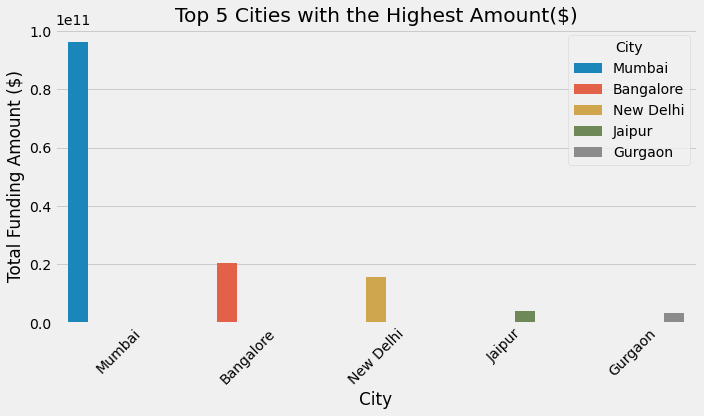

In [76]:
# Group the data by 'City' and calculate the total funding amount for each city
city_funding = df_main.groupby('City')['Amount($)'].sum().reset_index()

# Sort the cities based on the total funding amount in descending order and select the top 5
top_cities = city_funding.sort_values(by='Amount($)', ascending=False).head(5)

#Plotting the bar chart
plt.figure(figsize=(10,6))
plt.title("Top 5 Cities with the Highest Amount($)")
sns.barplot(x = "City", data = top_cities, y = "Amount($)", hue="City")
plt.xticks(rotation=45)

plt.xlabel('City')
plt.ylabel('Total Funding Amount ($)')

# Add spacing between the bars
plt.tight_layout()

plt.show()

## Top 5 Cities with the Highest Number of Companies/Startups

In [22]:
a = df_main.groupby("City")["Company/Brand"].count().reset_index()
a = a.sort_values("Company/Brand", ascending=False)

In [23]:
a = a.head(5)
a

,City,Company/Brand
6,Bangalore,471
52,Mumbai,248
54,New Delhi,157
27,Gurugram,84
15,Chennai,59


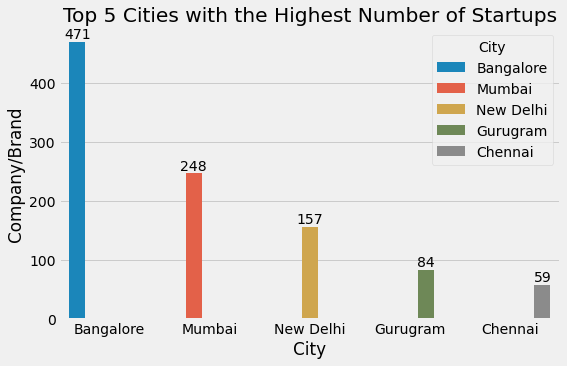

In [77]:
plt.figure(figsize=(8,5))
plt.title("Top 5 Cities with the Highest Number of Startups")
fig = sns.barplot(x = "City", data = a, y = "Company/Brand", hue="City")

fig.set(xlabel="City", ylabel="Company/Brand")
for i in fig.containers:
    fig.bar_label(i,)
plt.show()

In [25]:
b = df_main.groupby("Sector").count().reset_index()

In [26]:
b = b.sort_values(by="City", ascending=False)

In [27]:
b = b.head(5)

In [28]:
b

,Sector,Company/Brand,Industry,Series,Amount($),What it does,City,Sub city,Year,Founded,Founders,Investor,Stage,HeadQuarter
518,Fintech,73,0,5,73,73,73,0,73,73,73,73,68,0
486,Edtech,69,0,12,69,69,69,0,69,69,69,69,57,0
514,FinTech,173,0,0,173,173,51,0,173,173,173,173,173,122
483,EdTech,140,0,0,140,140,38,0,140,140,140,140,140,102
473,E-commerce,73,0,3,73,73,36,0,73,73,73,73,70,37


#### I have seen that there is one value which is same but differ because of one letter being uppercase. so i have to clean it first.

In [29]:
df_main["Sector"] = df_main["Sector"].replace('Fintech', "FinTech")
df_main["Sector"] = df_main["Sector"].replace('Edtech', "EdTech")

In [30]:
b = df_main.groupby("Sector").count().reset_index()
b = b.sort_values(by="City", ascending=False)
b = b.head(5)
b

,Sector,Company/Brand,Industry,Series,Amount($),What it does,City,Sub city,Year,Founded,Founders,Investor,Stage,HeadQuarter
513,FinTech,246,0,5,246,246,124,0,246,246,246,246,241,122
483,EdTech,209,0,12,209,209,107,0,209,209,209,209,197,102
473,E-commerce,73,0,3,73,73,36,0,73,73,73,73,70,37
559,Healthtech,30,0,1,30,30,26,0,30,30,30,30,29,4
703,SaaS,27,0,4,27,27,25,0,27,27,27,27,23,2


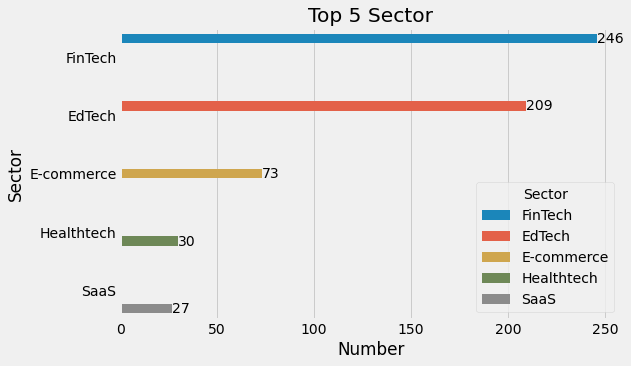

In [31]:
plt.figure(figsize=(8,5))
plt.title("Top 5 Sector")
fig = sns.barplot(y = "Sector", data = b, x = "Company/Brand", hue="Sector")

fig.set(xlabel="Number", ylabel="Sector")
for i in fig.containers:
    fig.bar_label(i,)
plt.show()

In [32]:
c = df_main.groupby("Year").sum()
c = c.sort_values(by="Year").reset_index()
c

,Year,Amount($)
0,2018,5.724083e+10
1,2019,3.336433e+09
2,2020,9.136121e+10
3,2021,1.798134e+11


### What is the trend in value of Indian start-up funding over the years?

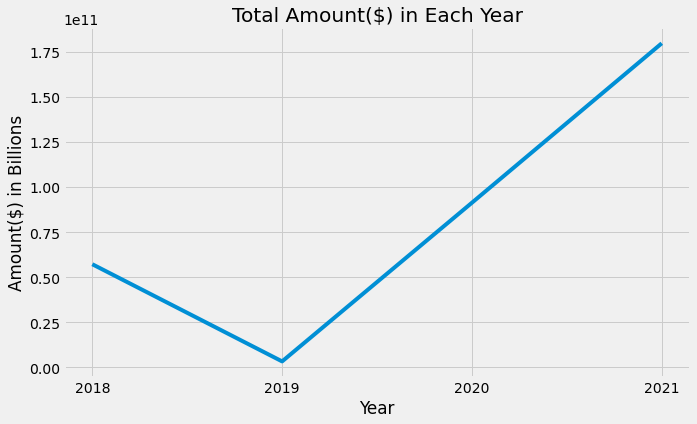

In [33]:
plt.figure(figsize=(10,6))
fig = sns.lineplot(data=c, x="Year", y="Amount($)")
plt.title("Total Amount($) in Each Year")
plt.ylabel("Amount($) in Billions")

for i in fig.containers:
    fig.bar_label(i,)
plt.show()

In [34]:
df_main

,Company/Brand,Industry,Series,Amount($),What it does,City,Sub city,Sector,Year,Founded,Founders,Investor,Stage,HeadQuarter
0,TheCollegeFever,Brand Marketing,Seed,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",Bangalore,Karnataka,"Event Promotion, Marketing, Sponsorship, Tick...",2018,NaN,NaN,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,40000000.0,A startup which aggregates milk from dairy far...,Mumbai,Maharashtra,Farming,2018,NaN,NaN,NaN,NaN,NaN
2,MyLoanCare,Credit,Series A,65000000.0,Leading Online Loans Marketplace in India,Gurgaon,Haryana,"Financial Services, Lending, Marketplace",2018,NaN,NaN,NaN,NaN,NaN
3,PayMe India,Financial Services,Angel,2000000.0,PayMe India is an innovative FinTech organizat...,Noida,Uttar Pradesh,FinTech,2018,NaN,NaN,NaN,NaN,NaN
4,Eunimart,E-Commerce Platforms,Seed,0.0,Eunimart is a one stop solution for merchants ...,Hyderabad,Andhra Pradesh,"Retail, SaaS",2018,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,NaN,NaN,3000000.0,A gig/on-demand staffing company.,NaN,NaN,Staffing & Recruiting,2021,2019,"Chirag Mittal, Anirudh Syal",Endiya Partners,Pre-series A,Gurugram
1205,Vahdam,NaN,NaN,20000000.0,VAHDAM is among the world’s first vertically i...,NaN,NaN,Food & Beverages,2021,2015,Bala Sarda,IIFL AMC,Series D,New Delhi
1206,Leap Finance,NaN,NaN,55000000.0,International education loans for high potenti...,NaN,NaN,Financial Services,2021,2019,"Arnav Kumar, Vaibhav Singh",Owl Ventures,Series C,Bangalore
1207,CollegeDekho,NaN,NaN,26000000.0,"Collegedekho.com is Student’s Partner, Friend ...",NaN,NaN,EdTech,2021,2015,Ruchir Arora,"Winter Capital, ETS, Man Capital",Series B,Gurugram


### Has the trend in the number of Indian start-ups increased or decreased over the years?

In [35]:
num_startup = df_main.groupby("Year").count().reset_index()

In [36]:
num_startup

,Year,Company/Brand,Industry,Series,Amount($),What it does,City,Sub city,Sector,Founded,Founders,Investor,Stage,HeadQuarter
0,2018,369,369,369,369,369,369,369,369,0,0,0,0,0
1,2019,89,0,89,89,89,89,0,89,89,89,89,0,0
2,2020,958,0,0,958,958,958,0,958,958,958,958,958,0
3,2021,1209,0,0,1209,1209,0,0,1209,1209,1209,1209,1209,1209


In [37]:
num_startup = num_startup.sort_values(by="Year", ascending=True)

In [38]:
num_startup

,Year,Company/Brand,Industry,Series,Amount($),What it does,City,Sub city,Sector,Founded,Founders,Investor,Stage,HeadQuarter
0,2018,369,369,369,369,369,369,369,369,0,0,0,0,0
1,2019,89,0,89,89,89,89,0,89,89,89,89,0,0
2,2020,958,0,0,958,958,958,0,958,958,958,958,958,0
3,2021,1209,0,0,1209,1209,0,0,1209,1209,1209,1209,1209,1209


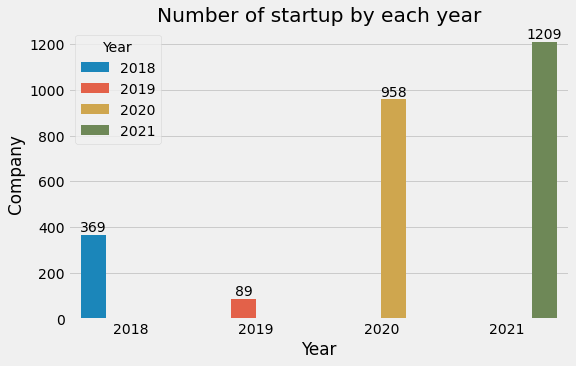

In [39]:
plt.figure(figsize=(8,5))
plt.title("Number of startup by each year")
fig = sns.barplot(x = "Year", data = num_startup, y = "Company/Brand", hue="Year")

fig.set(xlabel="Year", ylabel="Company")
for i in fig.containers:
    fig.bar_label(i,)
plt.show()

Standing from the above graph the number of start-ups decreased from 2018 to 2019, and then increased in 2020 before a further increase in 2021

### Which sector have the highest number of start-ups?


In [40]:
df_main.columns

Index(['Company/Brand', 'Industry', 'Series', 'Amount($)', 'What it does',
       'City', 'Sub city', 'Sector', 'Year', 'Founded', 'Founders', 'Investor',
       'Stage', 'HeadQuarter'],
      dtype='object')

In [41]:
df_main["Sector"] = df_main["Sector"].replace('Fintech', "FinTech")
df_main["Sector"] = df_main["Sector"].replace('Edtech', "EdTech")

In [42]:
b = df_main.groupby("Sector").count().reset_index()
b = b.sort_values(by="Company/Brand", ascending=False)
b = b.head(10)


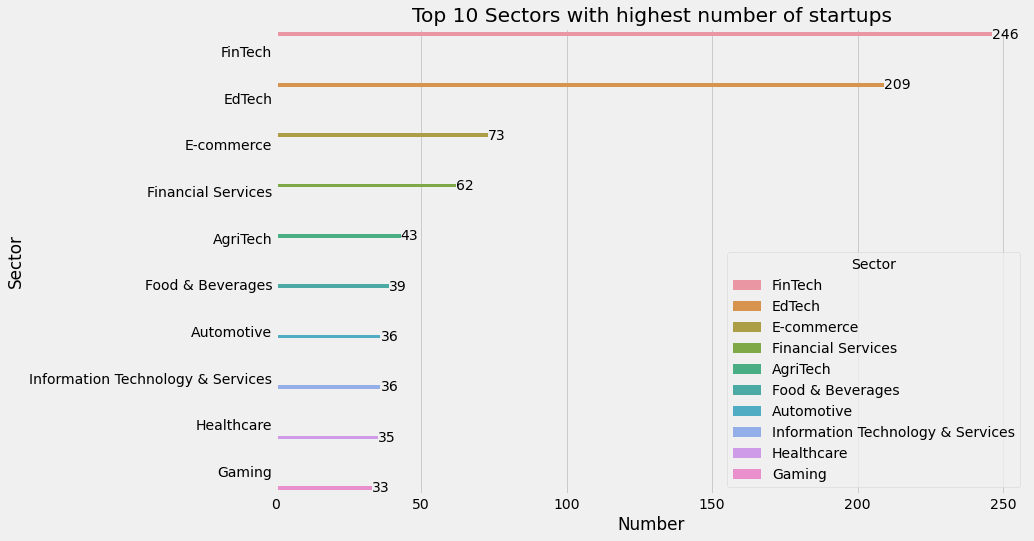

In [43]:
plt.figure(figsize=(12,8))
plt.title("Top 10 Sectors with highest number of startups")
fig = sns.barplot(y = "Sector", data = b, x = "Company/Brand", hue="Sector")

fig.set(xlabel="Number", ylabel="Sector")
for i in fig.containers:
    fig.bar_label(i,)
plt.show()

In [44]:
b = df_main.groupby("Sector").count().reset_index()
b = b.sort_values(by="Company/Brand", ascending=False)

In [45]:
b.describe()

,Company/Brand,Industry,Series,Amount($),What it does,City,Sub city,Year,Founded,Founders,Investor,Stage,HeadQuarter
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,3.306045,0.464736,0.576826,3.306045,3.306045,1.783375,0.464736,3.306045,2.841310,2.841310,2.841310,2.729219,1.522670
std,12.768115,0.715098,0.885510,12.768115,12.768115,6.440996,0.715098,12.768115,12.851367,12.851367,12.851367,12.421597,7.079987
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,246.000000,6.000000,12.000000,246.000000,246.000000,124.000000,6.000000,246.000000,246.000000,246.000000,246.000000,241.000000,122.000000


Describtion for the above chart

In [46]:
fintech = (248 / 572) * 100
fintech

43.35664335664335

In [47]:
edtech = (215 / 572) * 100
edtech

37.58741258741259

In [48]:
b = df_main.groupby("Sector").count().reset_index()
b = b.sort_values(by="Company/Brand", ascending=False)
b = b.head(10)


In [49]:
# total number for all the sector
b = df_main.groupby("Sector").count().reset_index()
b = b.sort_values(by="Company/Brand", ascending=False)
total_sec = b["Company/Brand"].sum()
total_sec

2625

In [50]:
# total number for all the top 10
b = df_main.groupby("Sector").count().reset_index()
b = b.sort_values(by="Company/Brand", ascending=False)
b = b.head(10)


# total number for top 10
total_top_10 = b["Company/Brand"].sum()
total_top_10

812

In [51]:
perc = (total_top_10 / total_sec) * 100

In [52]:
perc

30.933333333333334

From the chart, the top 10 sectors (Fintech, Edtech...) which have the highest number of start-ups consist of 31% of all startups. Among them Fintech and Edtech dominated with 31% of all startups 

### What is the average funding amount for Indian start-ups?

In [53]:
av_amount = df_main["Amount($)"].mean()

In [54]:
print("The average values for indian startup is",round(av_amount,2),"$.")

The average values for indian startup is 126381669.92 $.


### Are there any correlations between headquarters location and share of funding?

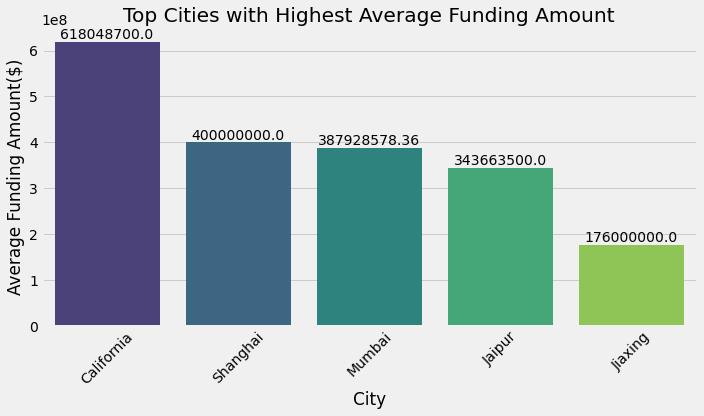

In [78]:
# Calculate the average amount for each city
avg_amount = df_main.groupby('City')['Amount($)'].mean().round(2).reset_index()

# Sort the cities based on the average amount in descending order and select the top 5
top_cities2 = avg_amount.sort_values(by='Amount($)', ascending=False).head(5)

# Plot the chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='City', y='Amount($)', data=top_cities2, palette='viridis')
plt.title('Top Cities with Highest Average Funding Amount')
plt.xlabel('City')
plt.ylabel('Average Funding Amount($)')
plt.xticks(rotation=45)
# Add data labels to the bars
for i, val in enumerate(top_cities2['Amount($)']):
    barplot.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## With this we know that Startups in California are likely to get higher funding than others

In [81]:
top_cities2

,City,Amount($)
13,California,6.180487e+08
79,Shanghai,4.000000e+08
52,Mumbai,3.879286e+08
33,Jaipur,3.436635e+08
35,Jiaxing,1.760000e+08


In [82]:
df_main.to_excel('main.xlsx', index=False)